In [3]:
import pandas as pd
import os
import csv
from pathlib import Path
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the CSV file into a dataframe
try:
    final_merged_df = pd.read_csv('/content/Output/final_dataset.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")

# **Exploratory Data Analysis (EDA)**

# Correlation Matrix


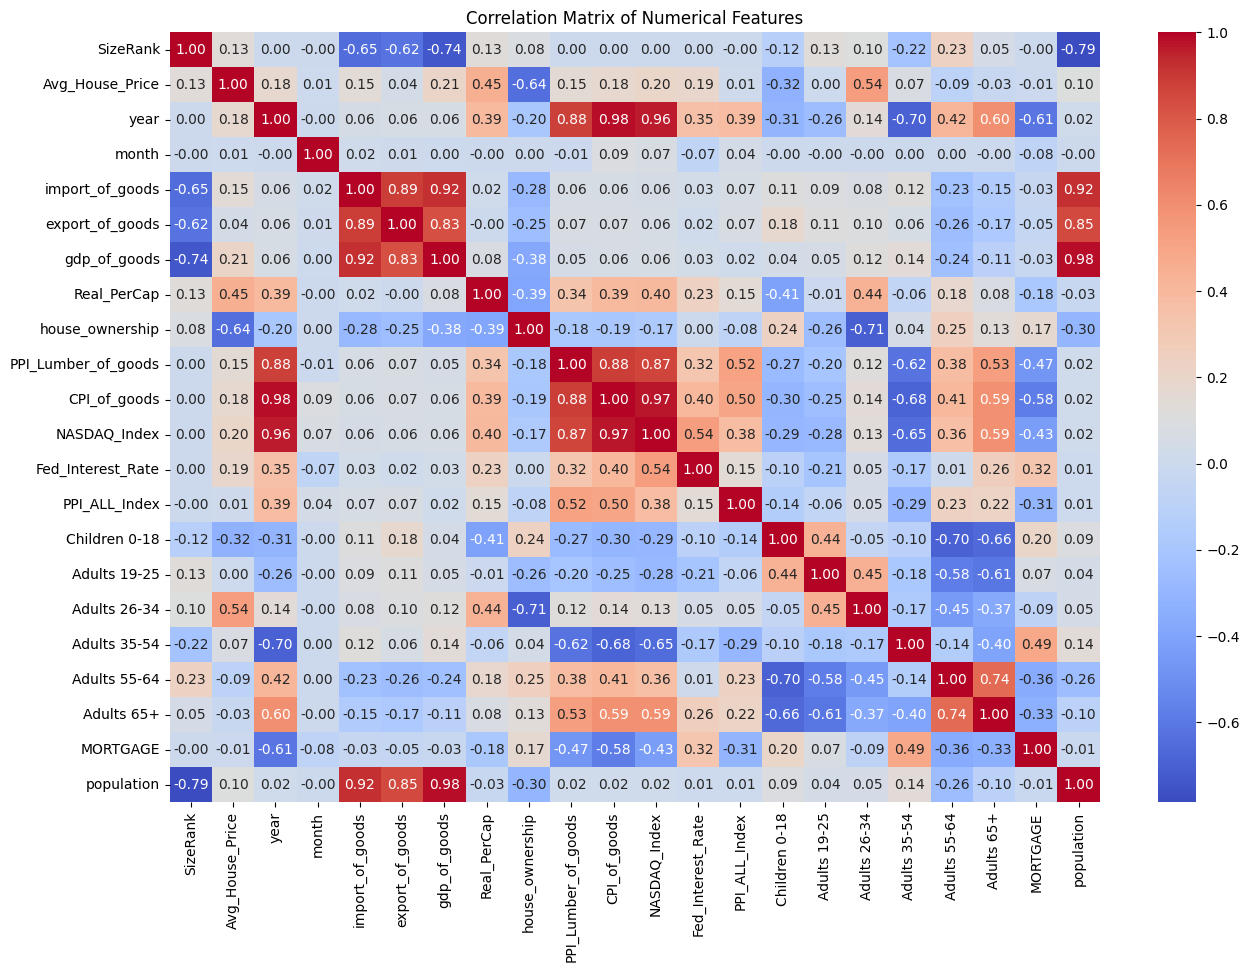

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation analysis
numerical_cols = final_merged_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = final_merged_df[numerical_cols].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Findings from the Correlation Matrix

The correlation matrix visualizes the pairwise correlations between all numerical features in the dataset. Key observations from the heatmap include:

*   **Average House Price ('Avg_House_Price')** shows varying degrees of correlation with other variables. We can see which features have the strongest positive or negative linear relationships with the target variable.
*   **Inter-feature correlations:** The heatmap also reveals relationships between the predictor variables themselves. High correlations between predictors might indicate multicollinearity, which can be important to consider for certain modeling techniques.

Specific correlations of interest with 'Avg_House_Price' (as observed in the heatmap and the subsequent bar plot):

*   'house_ownership' has a strong negative correlation.
*   'Real_PerCap', 'Adults 26-34', and 'gdp_of_goods' show positive correlations.
*   Other variables like 'import_of_goods', 'export_of_goods', various age groups, and economic indices exhibit weaker correlations, both positive and negative.

These correlations provide initial insights into which variables might be most influential in predicting average house prices.

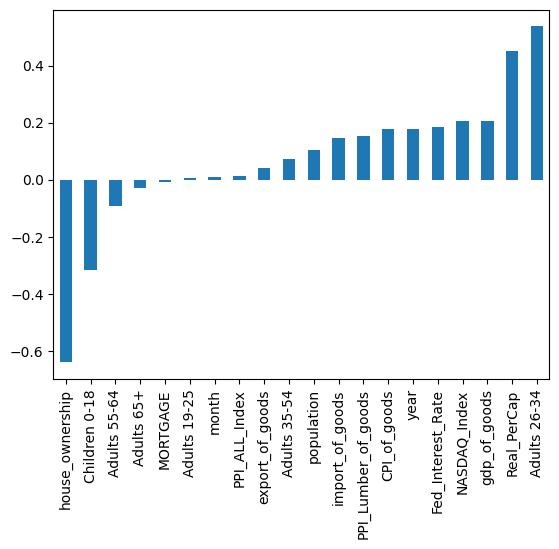

In [6]:
correlation_matrix["Avg_House_Price"][2:].sort_values().plot(kind = "bar");

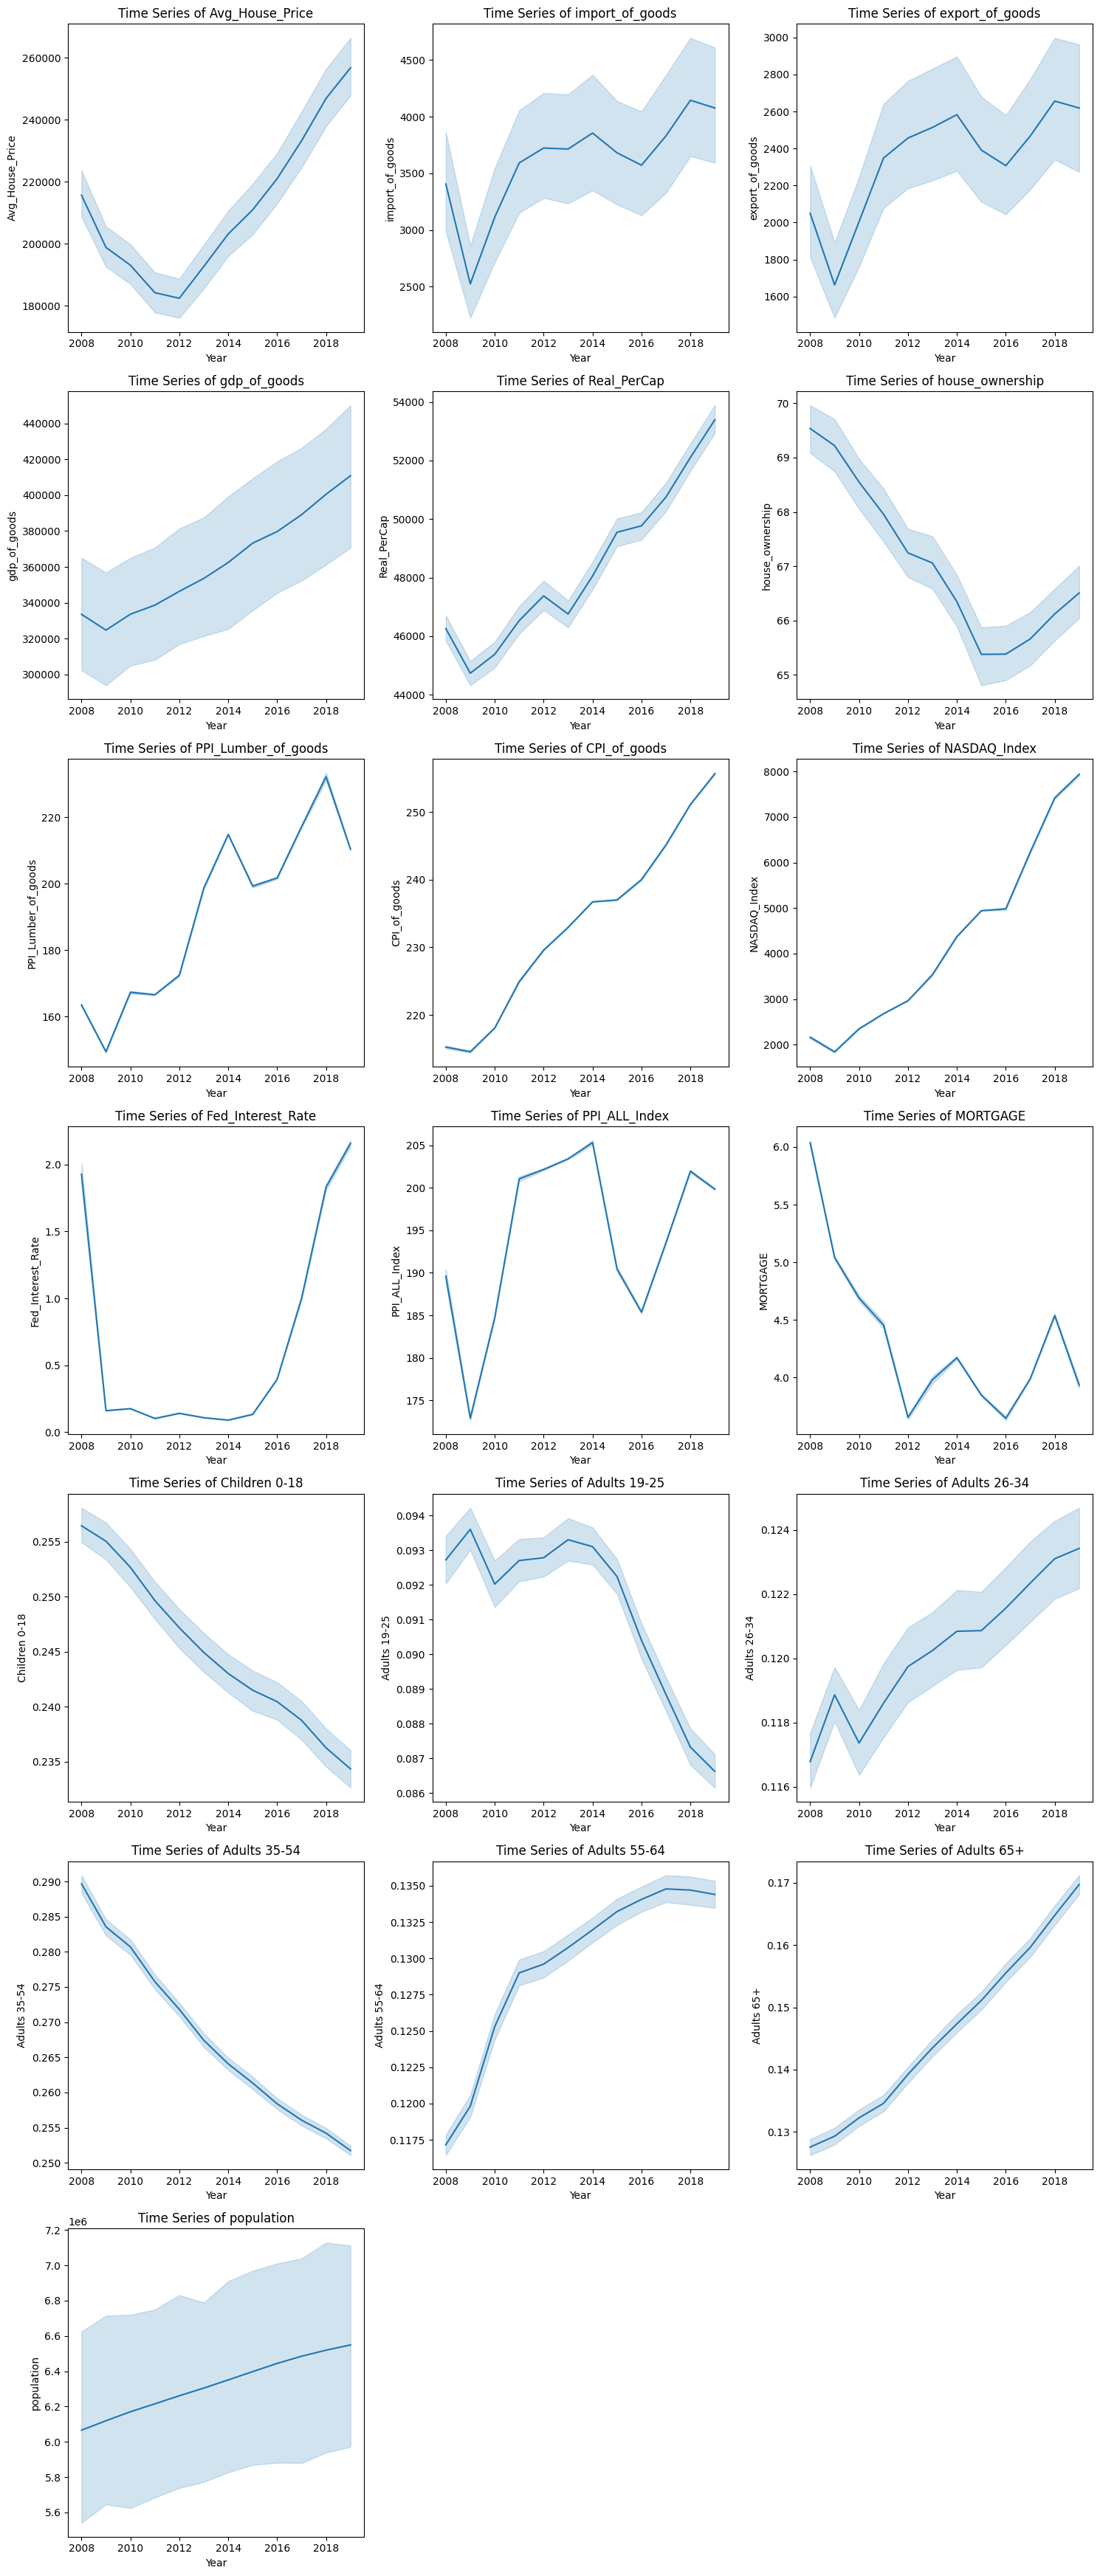

In [7]:
#Create time series plots for the specified numerical features for individual states and for the overall dataset.

import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical columns for plotting
numerical_cols = ['Avg_House_Price', 'import_of_goods', 'export_of_goods',
                  'gdp_of_goods', 'Real_PerCap', 'house_ownership',
                  'PPI_Lumber_of_goods', 'CPI_of_goods', 'NASDAQ_Index',
                  'Fed_Interest_Rate', 'PPI_ALL_Index', 'MORTGAGE',
                  'Children 0-18', 'Adults 19-25', 'Adults 26-34',
                  'Adults 35-54', 'Adults 55-64', 'Adults 65+', 'population']

# Determine the number of rows and columns for subplots
n_cols = 3  # You can adjust the number of columns as needed
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Create time series plots for each numerical column in subplots
for i, col in enumerate(numerical_cols):
    sns.lineplot(data=final_merged_df, x='year', y=col, ax=axes[i])
    axes[i].set_title(f'Time Series of {col}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Findings from the Time Series Plots

The time series plots provide a visual overview of how various economic, demographic, and housing-related variables have changed over time (from 2008 to 2019) in the dataset. Key trends observed include:

*   **Average House Price ('Avg_House_Price'):** The plot shows a notable dip in average house prices around 2010-2012, likely reflecting the impact of the 2008 financial crisis, followed by a general upward trend in subsequent years.
*   **Import and Export of Goods:** Both import and export values show fluctuations over the period, with a general recovery after the initial dip around 2008-2009.
*   **GDP of Goods:** State-level GDP of goods exhibits a consistent upward trend throughout the analyzed period, indicating overall economic growth.
*   **Real Per Capita Income:** Similar to GDP, real per capita income also shows a general increasing trend, suggesting improving economic well-being over time.
*   **House Ownership:** The house ownership rate appears to have a slight downward trend or stagnation in the earlier years, potentially related to the housing market downturn, followed by a relatively stable period.
*   **Price Indices (PPI Lumber, CPI All, PPI All Index):** These indices show varying patterns, reflecting changes in the cost of goods and overall inflation.
*   **NASDAQ Index:** The NASDAQ index shows significant growth over the period, particularly in the later years, indicating a strong performance in the technology sector.
*   **Fed Interest Rate and MORTGAGE:** The Federal Interest Rate and Mortgage rates show a declining trend in the years following the financial crisis, reaching low points before starting to rise again towards the end of the period.
*   **Age Demographics:** The proportion of different age groups in the population shows gradual shifts over time, which can be indicative of demographic trends. For example, the 'Adults 65+' group appears to be increasing, while some younger age groups might be decreasing or stable.
*   **Population:** Total state population shows a steady upward trend, reflecting overall population growth.

These time series trends provide valuable context for understanding the dynamics of the housing market and the potential influence of these factors on average house prices.

## Compare Avg_House_Price with other variables at state level


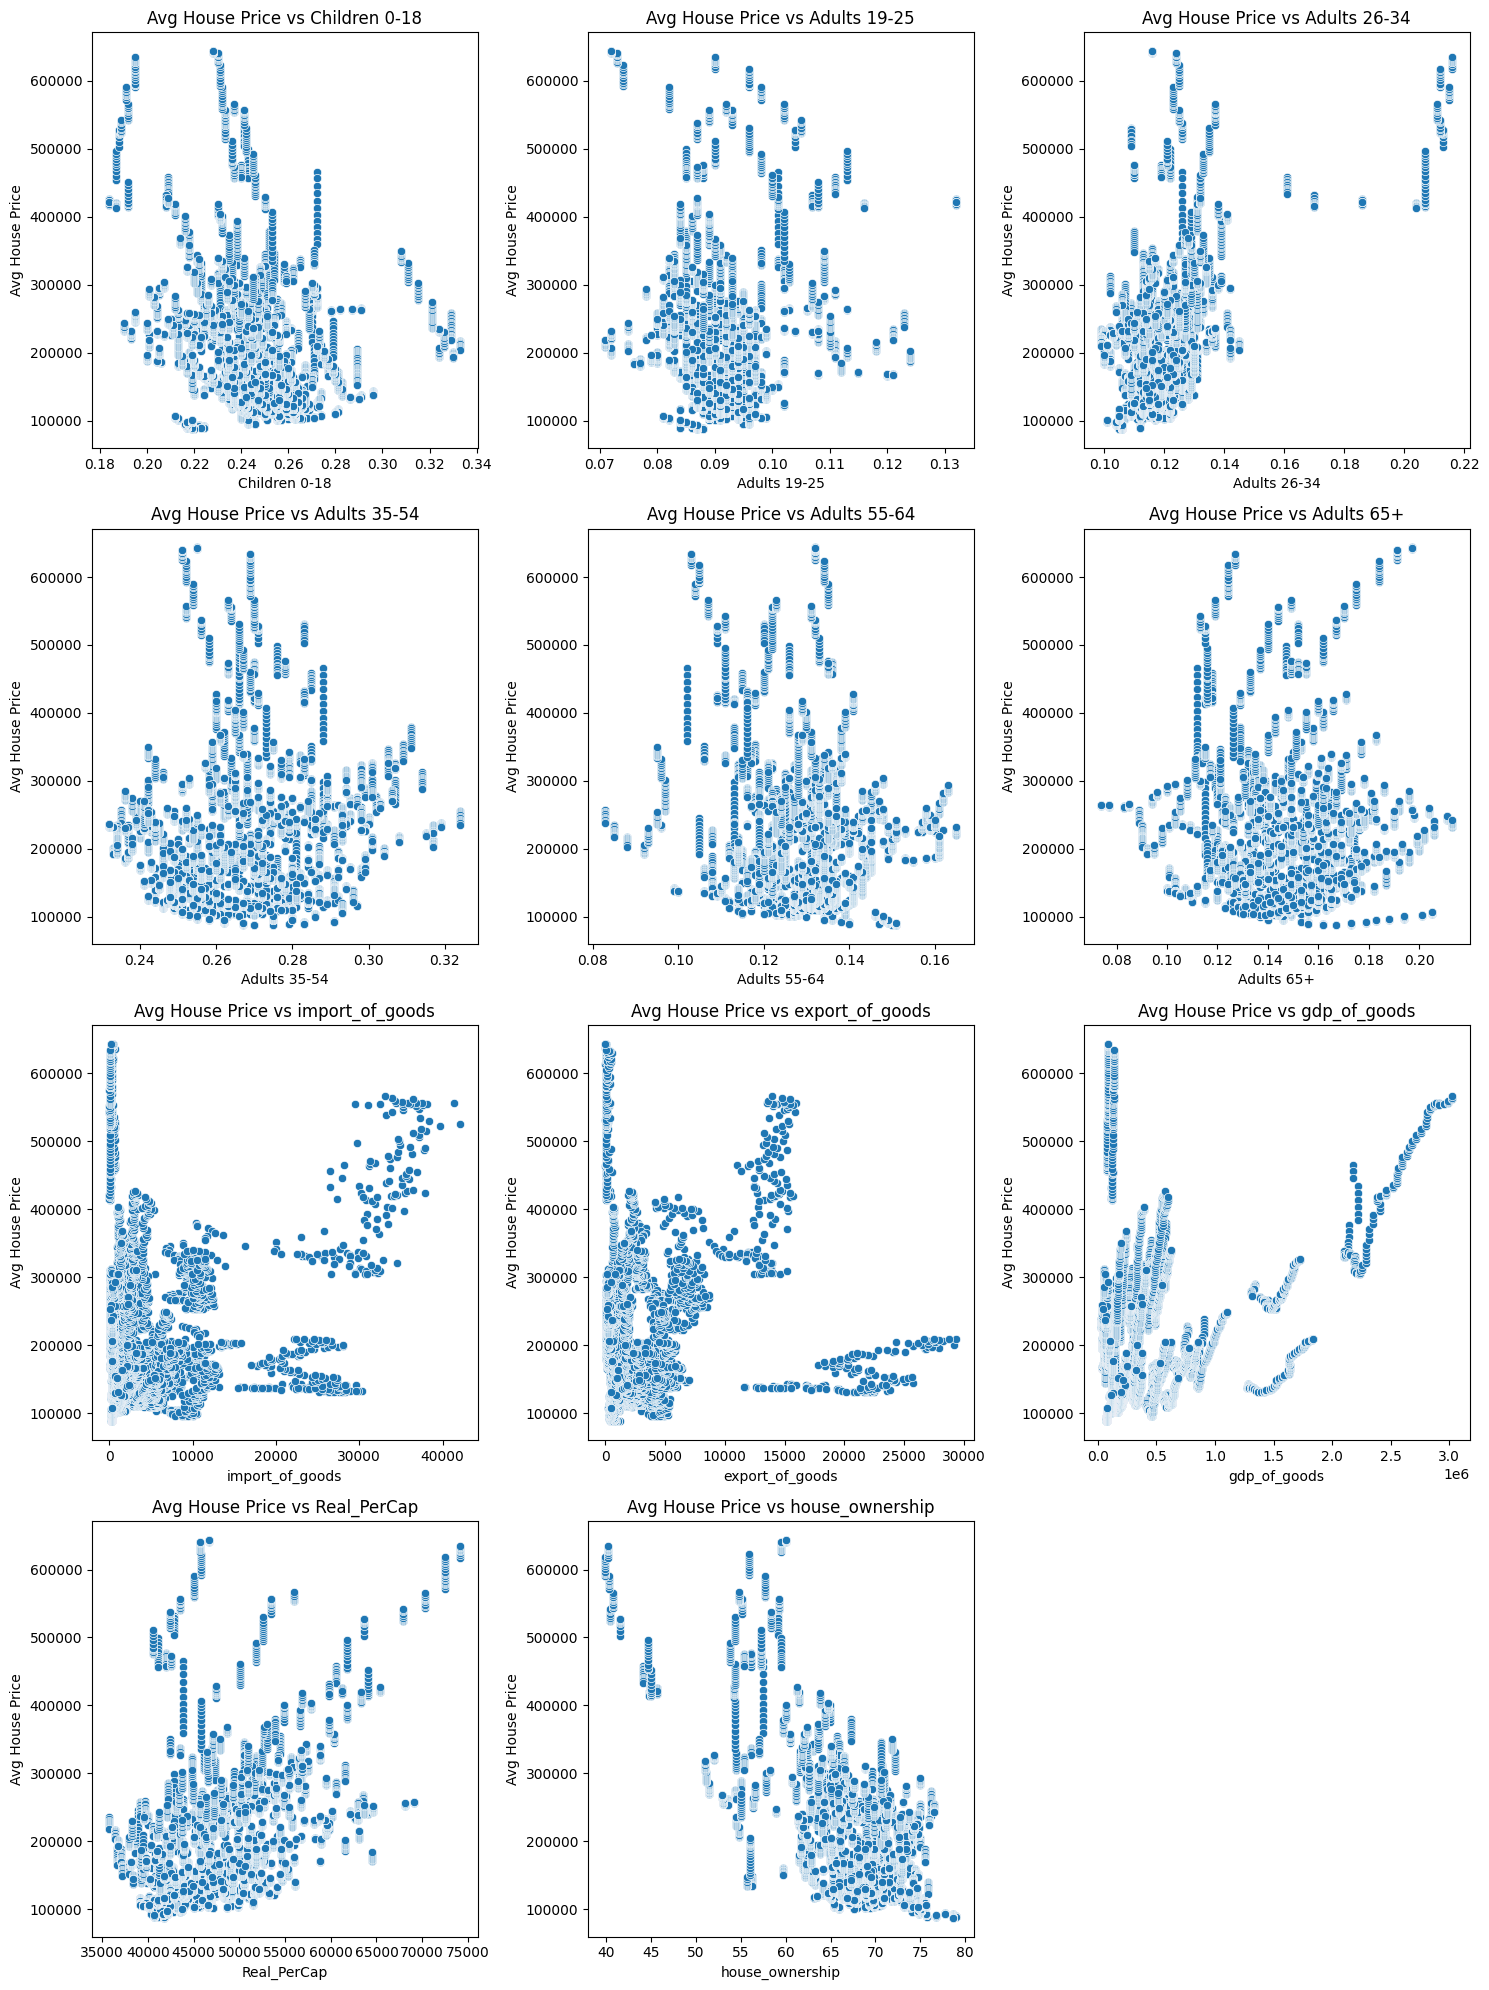

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create scatter plots to visualize the relationship between 'Avg_House_Price' and age demographics, imports, exports, GDP, per capita income, and house ownership at the state level.

# List of variables to compare with Avg_House_Price
comparison_vars = ['Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
                   'Adults 55-64', 'Adults 65+', 'import_of_goods', 'export_of_goods',
                   'gdp_of_goods', 'Real_PerCap', 'house_ownership']

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(comparison_vars) + n_cols - 1) // n_cols

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Create scatter plots for each comparison variable against Avg_House_Price
for i, var in enumerate(comparison_vars):
    sns.scatterplot(data=final_merged_df, x=var, y='Avg_House_Price', ax=axes[i])
    axes[i].set_title(f'Avg House Price vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Avg House Price')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Summary of Exploratory Data Analysis Findings**

Based on the correlation matrix and scatter plots generated during the exploratory data analysis, here are the key findings regarding the relationships between Average House Price and other variables in the dataset:

**Variables with Strong Correlations with Average House Price:**

*   **House Ownership (-0.64):** There is a strong negative correlation between house ownership rate and average house price. This suggests that states with lower home ownership rates tend to have higher average house prices. This could be due to factors like affordability constraints in expensive markets, where a smaller percentage of the population can afford to own a home.
*   **Real Per Capita Income (0.45):** Real per capita income shows a moderate positive correlation with average house price. This aligns with expectations, as higher income levels generally correspond to greater purchasing power and thus higher housing demand and prices.
*   **Adults 26-34 (0.54):** The proportion of the population in the 26-34 age group exhibits a moderate positive correlation with average house price. This age group often represents a significant portion of first-time homebuyers, and a larger presence of this demographic could drive up housing demand and prices.
*   **GDP of Goods (0.21):** State-level GDP of goods has a positive correlation with average house price, indicating that states with stronger economies (as measured by GDP) tend to have higher average housing values.

**Variables with Moderate to Weak Correlations with Average House Price:**

*   **Imports (0.15) and Exports (0.04):** The volume of imports and exports show relatively weak positive correlations with average house price. While international trade can influence economic activity, its direct impact on average house prices at the state level in this dataset appears to be limited.
*   **PPI Lumber (0.15), CPI All (0.18), NASDAQ Index (0.20), Fed Interest Rate (0.19), PPI All Index (0.01):** These economic indicators show varying degrees of correlation with average house price. The CPI All and NASDAQ Index have slightly stronger positive correlations compared to PPI Lumber and PPI All Index. The Federal Interest Rate shows a weak positive correlation. These relationships suggest that broader economic conditions and market sentiment have some influence on housing prices.

**Variables with Very Weak or Negligible Correlations with Average House Price:**

*   **MORTGAGE (-0.01):** The average mortgage rate shows a negligible correlation with average house price in this dataset. This is unexpected, as mortgage rates typically have a significant impact on housing affordability and demand. Further investigation might be needed to understand this weak relationship in this specific dataset.

**Other Age Demographic Groups:**

*   **Children 0-18 (-0.32):** Shows a moderate negative correlation with average house price.
*   **Adults 19-25 (0.00), Adults 35-54 (0.07), Adults 55-64 (-0.09), Adults 65+ (-0.03):** These age groups show weak or negligible correlations with average house price.

**Overall Assessment for Predicting Average House Price:**

Based on the presence of several variables with moderate to strong correlations (especially house ownership, Real Per Capita Income, Adults 26-34, and GDP of Goods), this dataset appears to be a reasonably good starting point for predicting average house price. The variables with weaker correlations might still contribute to a predictive model, and their combined effect could be significant.

However, it's important to note that correlation does not imply causation. Further analysis and modeling techniques would be required to build a robust predictive model and understand the causal relationships between these variables and average house prices.

# Why We Use “Relative Increase” (Jan-2008 = 0%) — and Why It Matters

# What It Is

We set each state’s average house price and other micro-economic factors to 0% at Jan-2008 as the base reference point and then track how much each feature grows over time relative to that baseline. In other words, we compare growth trajectories, not raw dollar levels.

Using relative increase provides clean, comparable growth signals across states. It removes the bias of who started at a higher price point and instead highlights the local micro-economics—such as real income growth, demographic mix, and supply changes—that truly drive prices. It also makes timing clearer by revealing turning points (after policy shifts, permit surges, or interest rate pivots).

In short: it transforms a noisy national uptrend into a set of actionable, local growth stories that you can rank, monitor, and invest against.

The relative dataset is stored at: /content/Output/dataset_relative.csv

# Micro Factors Stand Out (Local Stories Become Visible)

The problem with raw levels: National forces—like inflation and nationwide credit cycles—push everything up over long periods. That can mask local effects.

What relative increase fixes: By focusing on changes, national drift fades and local drivers become clear:

Real income gains → stronger purchasing power

Population & age mix → household formation or retiree inflows

Building permits & zoning → signals of future supply

Major employer moves → shifts in local wages and jobs

School quality & transit access → neighborhood desirability

Local policies → property taxes, short-term rental rules, etc.

# **Exploratory Data Analysis (EDA)**

# Correlation Matrix


In [9]:
## intiate the Standard Scaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Load the CSV file into a dataframe
try:
    dataset_relative = pd.read_csv('/content/Output/dataset_relative.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")


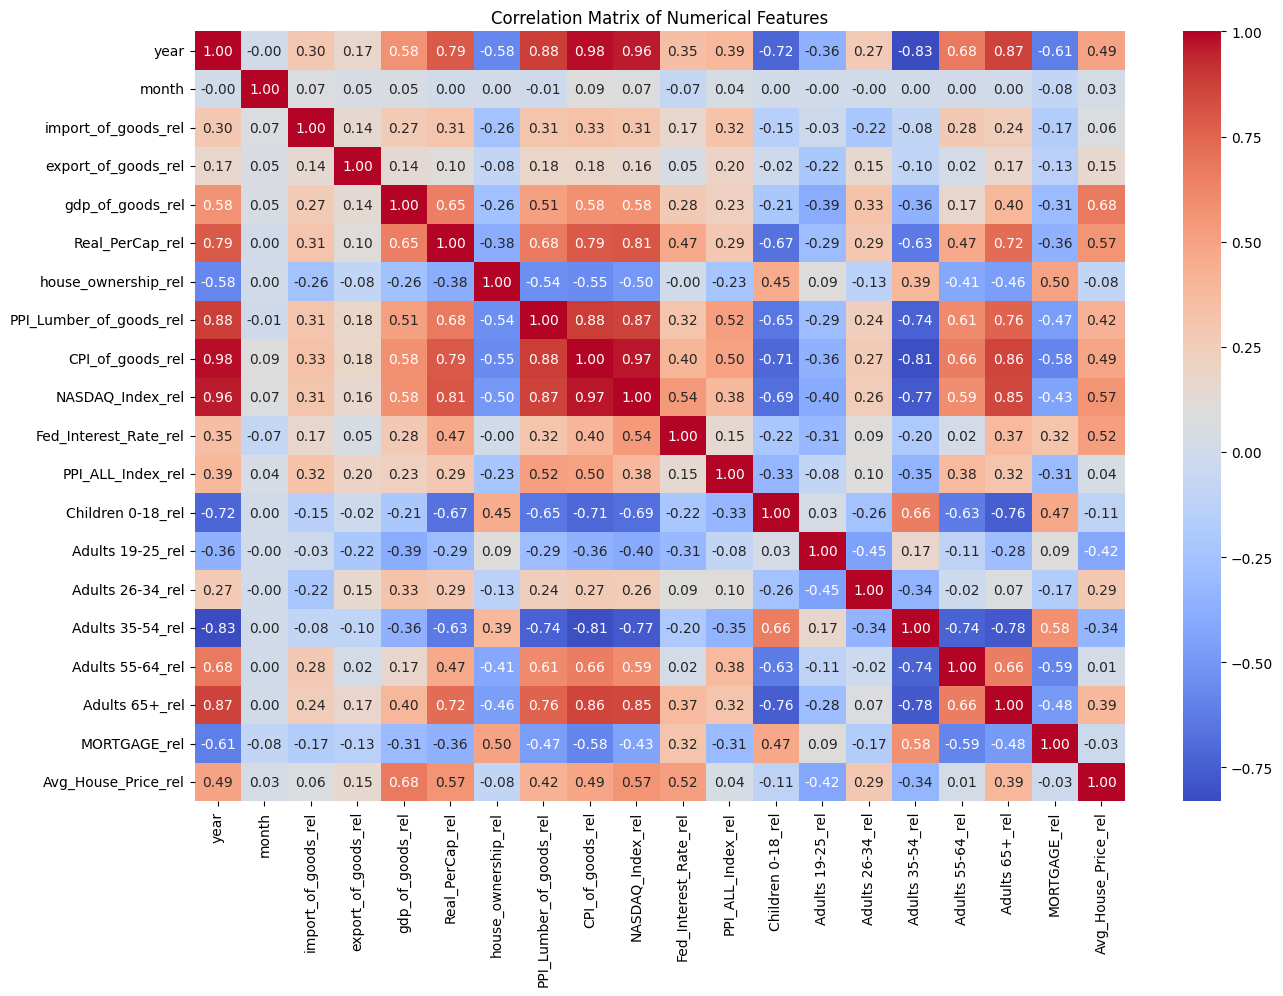

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation analysis
numerical_cols = dataset_relative.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = dataset_relative[numerical_cols].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

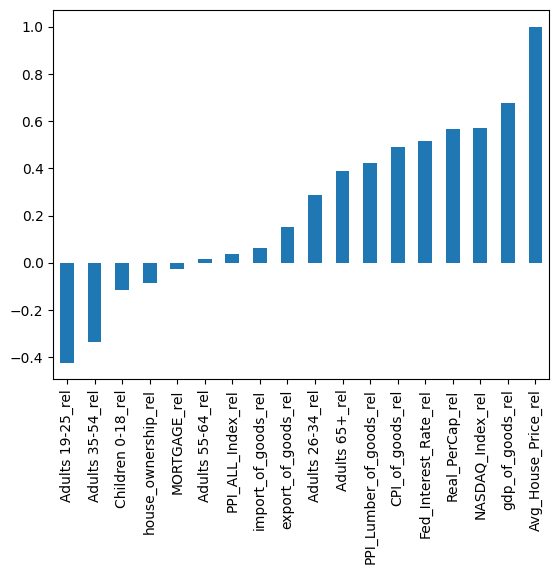

In [11]:
correlation_matrix["Avg_House_Price_rel"][2:].sort_values().plot(kind = "bar");

# Relative data Correlation vs regular correlation

*   For regular data Correlation matrix, variables that generally rose over time (e.g., incomes, GDP, NASDAQ) show strong positive links; things that fell (like homeownership rate) show strong negative links.

*   In the relative chart, those time effects are dampened, so relationships shrink or flip. Age-group effects change the most:
     *   19–25 skew more negative,

     *   65+ is clearly positive,

     *   Children 0–18 is only slightly negative.

## Compare Avg_House_Price with other variables at state level


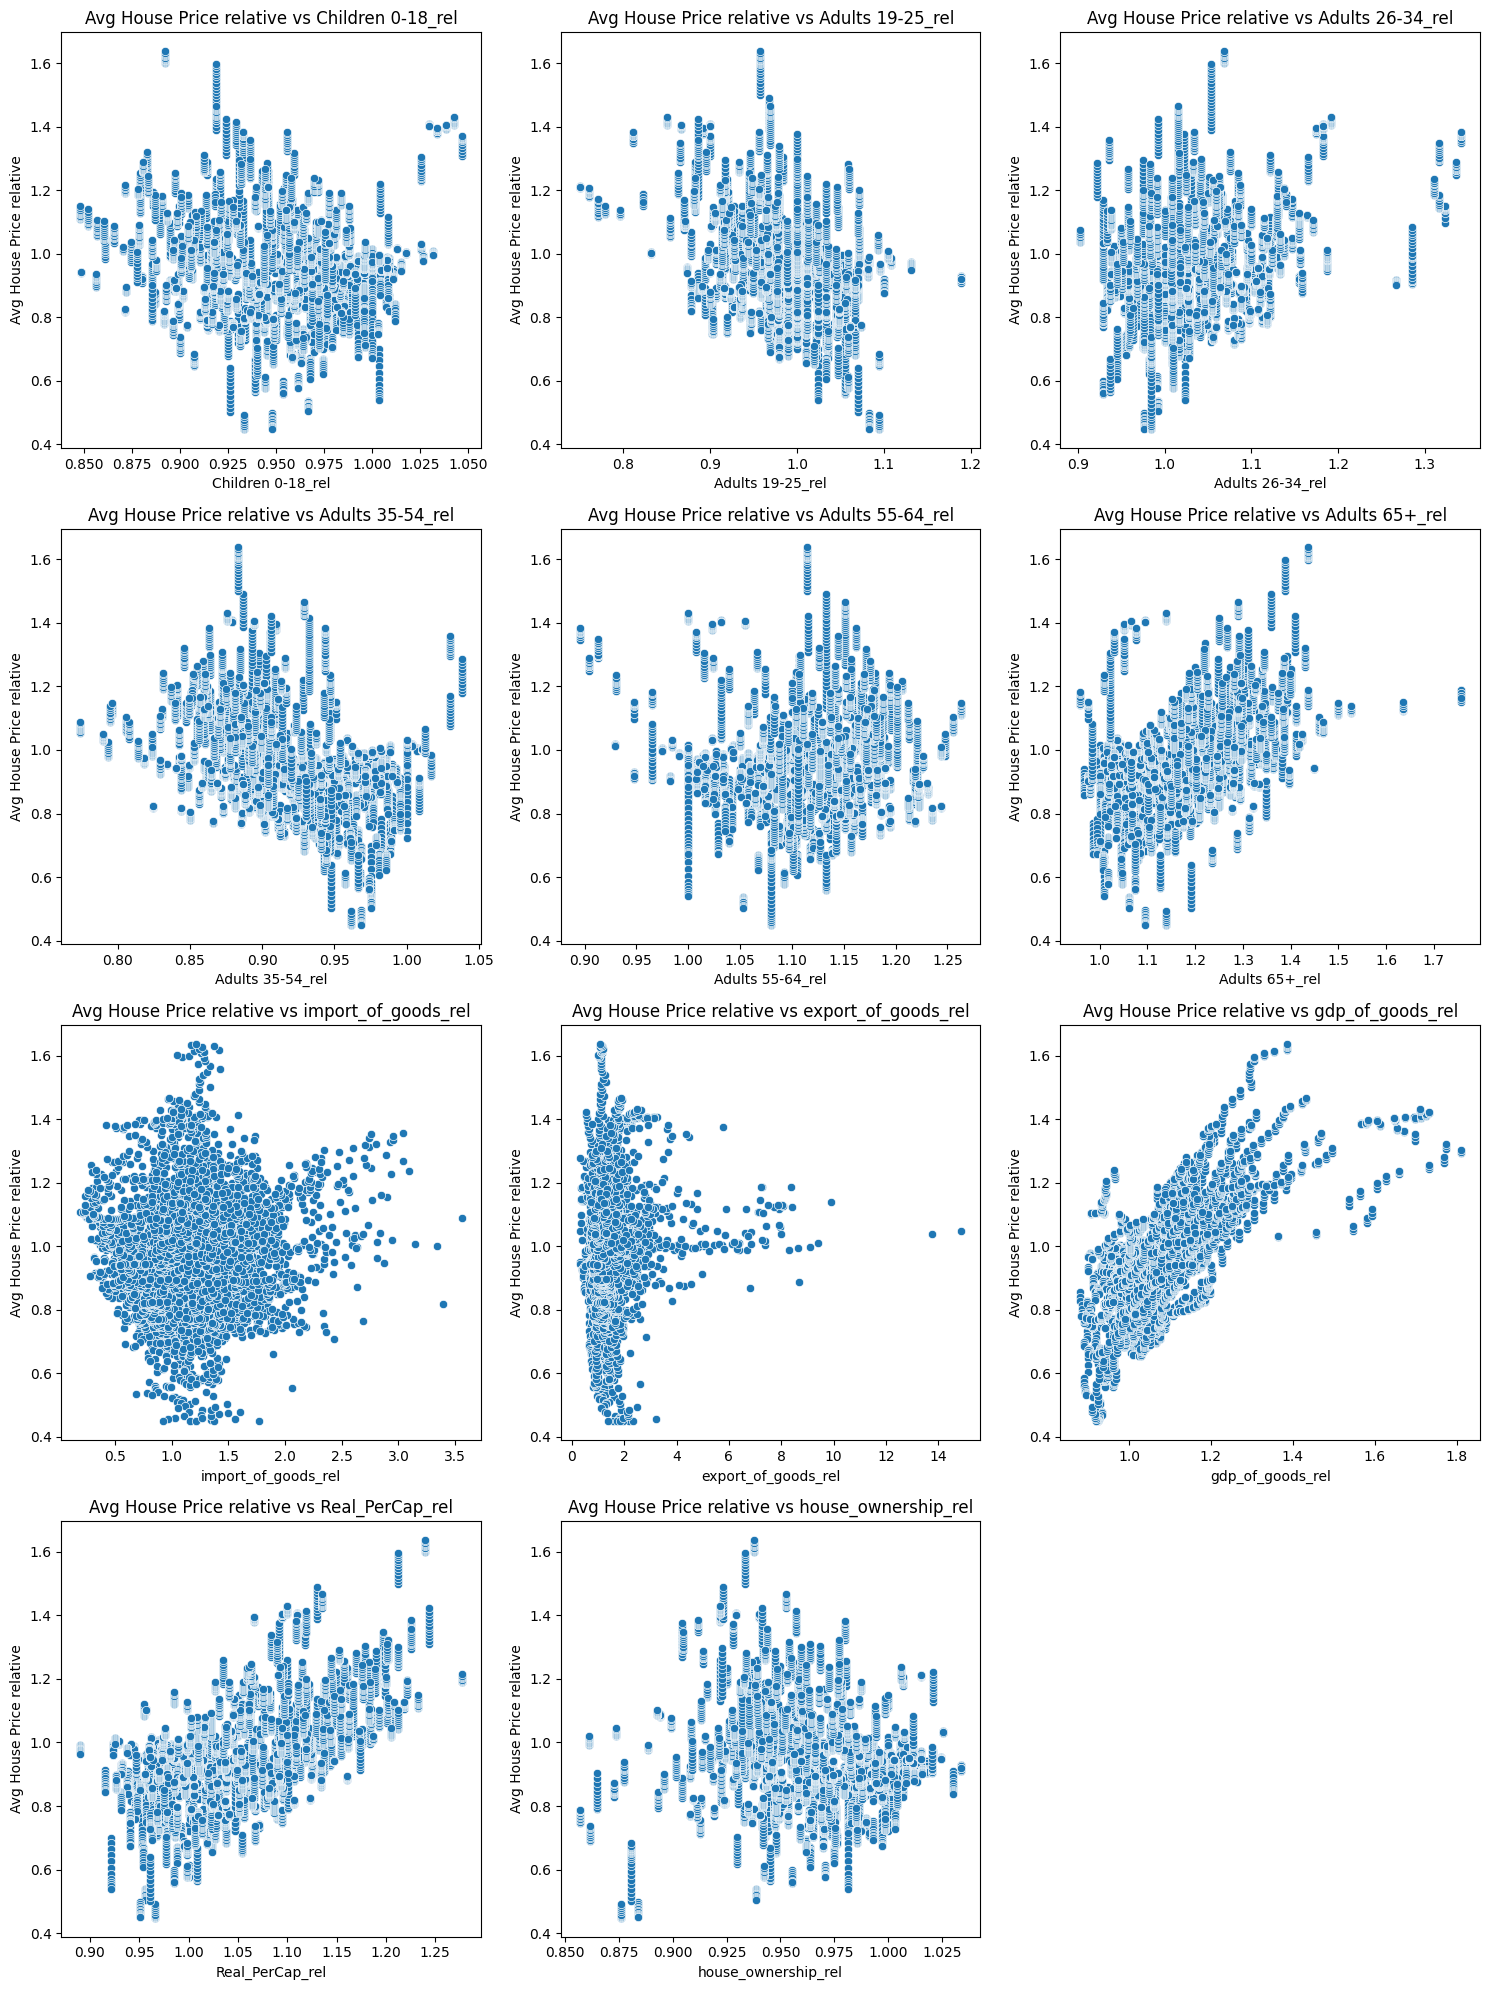

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#Create scatter plots to visualize the relationship between 'Avg_House_Price' and age demographics, imports, exports, GDP, per capita income, and house ownership at the state level.

# List of variables to compare with Avg_House_Price
comparison_vars = ['Children 0-18_rel', 'Adults 19-25_rel', 'Adults 26-34_rel', 'Adults 35-54_rel',
                   'Adults 55-64_rel', 'Adults 65+_rel', 'import_of_goods_rel', 'export_of_goods_rel',
                   'gdp_of_goods_rel', 'Real_PerCap_rel', 'house_ownership_rel']

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(comparison_vars) + n_cols - 1) // n_cols

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Create scatter plots for each comparison variable against Avg_House_Price
for i, var in enumerate(comparison_vars):
    sns.scatterplot(data=dataset_relative, x=var, y='Avg_House_Price_rel', ax=axes[i])
    axes[i].set_title(f'Avg House Price relative vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Avg House Price relative')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Summary of Findings (from the relative-increase EDA)

* Strong correlation with higher house-price growth:
    Goods-sector GDP, real income per person, broad market backdrop (NASDAQ), and cost indicators (CPI for goods, Lumber PPI).
* Demographics: Bigger shares of Adults 26–34 and 65+ align with higher price growth; larger 19–25 and 35–54 shares align with lower growth.
* Weaker signals: Home-ownership rate had a significant impact in the regualr datatset, in relative dataset it has a very week signal
* mortgage series, and trade flows (imports/exports) show limited relationship to price growth here.
* Notes: These are associations, not causes; several variables trend together over time.

